In [1]:
import multiprocessing
import os
from re import A
from typing import ItemsView

from py import log
os.environ['PYTHONDONTWRITEBYTECODE'] = '1'
from xtquant import xttrader
from xtquant.xttrader import XtQuantTrader, XtQuantTraderCallback
from xtquant.xttype import StockAccount
from xtquant import xtconstant
import pandas_market_calendars as mcal
import pandas as pd
import akshare as ak

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
def plot(df, column):
    
    # 设置中文字体
    mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为 SimHei
    mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

    # 假设这是你的DataFrame，其中包含收益

    # 绘制收益曲线
    # 将日期列转换为日期类型
    # df['date'] = pd.to_datetime(df['date'])

    # # 设置日期列为索引
    # df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)
    # 绘制收益曲线
    plt.figure(figsize=(10, 6))  # 设置图表大小
    plt.plot(df.index, df[column], label='Return')
    plt.title('收益曲线')
    plt.xlabel('日期')
    plt.ylabel('收益率')
    plt.legend()  # 显示图例
    plt.grid(True)  # 显示网格线

    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

    plt.show()

d:\anaconda3\envs\python3.8\lib\site-packages\exchange_calendars\exchange_calendar.py:2345: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  align: pd.Timedelta | str = pd.Timedelta(1, "T"),


In [2]:
from xtquant import xtdatacenter as xtdc
xtdc.set_token("26e6009f4de3bfb2ae4b89763f255300e96d6912")

print('xtdc.init')
xtdc.init() # 初始化行情模块，加载合约数据，会需要大约十几秒的时间
print('done')

from xtquant import xtdata 

xtdc.init
done


In [3]:
hd_pct = 0.005

params = [
                   {
                    'filtered': True,
                    'fx_filtered': True,
                    'topn': 1,
                    'top_fx': 1,
                    'top_cx': 2,
                    'only_fx': True,
                    'enbale_industry': True,
                    'empty_priority': True
                    }
            ]
filter_count = 0
filter_amount = 6000000

In [4]:
def get_first_tick_trade_amount(stock_code, datekey):
    import datetime
    import pandas as pd

    today = datetime.datetime.strptime(datekey, '%Y-%m-%d').date()

    time_0930 = datetime.time(9, 20, 0)

    dt_0930 = datetime.datetime.combine(today, time_0930)

    timestamp_0930 = dt_0930.timestamp()

    time_09305 = datetime.time(9, 26, 0)

    dt_09305 = datetime.datetime.combine(today, time_09305)

    timestamp_09305 = dt_09305.timestamp()

    tims = int(timestamp_0930*1000)

    tims5 = int(timestamp_09305*1000)
    import numpy as np
    n_data_key = datekey.replace('-', '')
    xtdata.download_history_data(stock_code, 'tick', n_data_key, n_data_key)
    all_tick_data = xtdata.get_market_data(stock_list=[stock_code], period='tick', start_time=n_data_key, end_time=n_data_key)

    # 假设 all_tick_data['000759.SZ'] 是 numpy.void 数组
    if isinstance(all_tick_data[stock_code], np.ndarray) and all_tick_data[stock_code].dtype.type is np.void:
        df = pd.DataFrame(all_tick_data[stock_code].tolist(), columns=all_tick_data[stock_code].dtype.names)
    else:
        raise

    filtered_df = df[(df['time'] >= tims) & (df['time'] <= tims5)]

    # 按 time 列升序排序
    sorted_df = filtered_df.sort_values(by='time')

    # 取 time 最小的行
    min_time_row = sorted_df.tail(1)

    amount = min_time_row['amount']

    if len(amount) == 1:
        real_amount = amount.item()
    else:
        raise Exception(f"{stock_code}-{datekey}")

    return real_amount


def get_real_open_price(stock_code, datekey):
    import datetime

    today = datetime.datetime.strptime(datekey, '%Y-%m-%d').date()

    time_0930 = datetime.time(9, 29, 0)

    dt_0930 = datetime.datetime.combine(today, time_0930)

    timestamp_0930 = dt_0930.timestamp()

    time_09305 = datetime.time(9, 30, 5)

    dt_09305 = datetime.datetime.combine(today, time_09305)

    timestamp_09305 = dt_09305.timestamp()

    tims = int(timestamp_0930*1000)

    tims5 = int(timestamp_09305*1000)
    import numpy as np
    n_data_key = datekey.replace('-', '')
    xtdata.download_history_data(stock_code, 'tick', n_data_key, n_data_key)
    all_tick_data = xtdata.get_market_data(stock_list=[stock_code], period='tick', start_time=n_data_key, end_time=n_data_key)

    # 假设 all_tick_data['000759.SZ'] 是 numpy.void 数组
    if isinstance(all_tick_data[stock_code], np.ndarray) and all_tick_data[stock_code].dtype.type is np.void:
        df = pd.DataFrame(all_tick_data[stock_code].tolist(), columns=all_tick_data[stock_code].dtype.names)
    else:
        raise

    filtered_df = df[(df['time'] >= tims) & (df['time'] <= tims5)]

    # 按 time 列升序排序
    sorted_df = filtered_df.sort_values(by='time')

    # 取 time 最小的行
    min_time_row = sorted_df.head(1)

    last_price = min_time_row['lastPrice']

    # 检查 Series 是否只有一个元素
    if len(last_price) == 1:
        last_price_real = last_price.item()
    else:
        raise Exception(f"{stock_code}-{datekey}")

    return last_price_real

In [5]:
all_stocks = {}
all_stocks_info = xtdata.get_stock_list_in_sector('沪深A股')
for stock in all_stocks_info:
    if stock.startswith('60') or stock.startswith('00'):
        cde = stock.split('.')[0]
        all_stocks[cde] = stock

def group_filter_fx(group, filtered = True, fx_filtered = True, topn = 3, top_fx = 2, top_cx = 2, only_fx = False, enbale_industry= False, filter_amount = filter_amount, all_stocks = all_stocks):
    if filter_amount > 0:
        masks = []
        first_tick_amounts = []  # 存储每行的 first_tick_amount
        
        # 遍历每一行并计算值
        for _, row in group.iterrows():
            if row['stock_code'].split('.')[0] not in all_stocks:
                masks.append(False)
                first_tick_amounts.append(0)
                continue
            stock_code = all_stocks[row['stock_code'].split('.')[0]]
            date_key = row['date_key']
                
            # 计算 first_tick_amount
            first_tick_amount = get_first_tick_trade_amount(stock_code, date_key)
            first_tick_amounts.append(first_tick_amount)  # 记录值
            if first_tick_amount > filter_amount:
                masks.append(True)
            else:
                print(f"过滤股票 {stock_code} 日期 {date_key} 过滤原因： first_tick_amount {first_tick_amount}")
                masks.append(False)
                global filter_count
                filter_count = filter_count + 1
            # 生成过滤掩码
        
        # 将 first_tick_amount 添加到原始分组中
        group = group.copy()  # 避免 SettingWithCopyWarning
        group['first_tick_amount'] = first_tick_amounts
        
        # 应用过滤
        group = group[masks]
            
    if not filtered:
        valid_rows = group[(group['open_price'] > 0) & (group['next_day_open_price'] > 0) & (group['stock_rank'] <= topn) & (group['next_day_close_price'] > 0)]
        if len(valid_rows) > 0:
            valid_rows['return'] = valid_rows['next_day_open_price'] / valid_rows['open_price'] - 1
            valid_rows['real_return'] = valid_rows['return'] - hd_pct
            valid_rows['close_return'] = valid_rows['next_day_close_price'] / valid_rows['open_price'] - 1
            valid_rows['close_real_return'] = valid_rows['close_return'] - hd_pct
            avg_value = valid_rows['return'].mean()
            close_avg_value = valid_rows['close_return'].mean()
            rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
            if len(rank_one_row) > 0:
                # 将平均值赋给 rank 为 1 的行的指定列
                rank_one_row['return'] = avg_value
                rank_one_row['real_return'] = avg_value - hd_pct
                rank_one_row['close_return'] = close_avg_value
                rank_one_row['close_real_return'] = close_avg_value - hd_pct
                return rank_one_row
        else:
            rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
            if len(rank_one_row) > 0:
                rank_one_row['return'] = -10
                rank_one_row['real_return'] = -10
                rank_one_row['close_return'] = -10
                rank_one_row['close_real_return'] = -10
                return rank_one_row
    else:
        if fx_filtered:
            min_category_rank = group['max_block_category_rank'].min()
            
            industry_rank_one_row = group[group['max_industry_code_rank'] == 1].copy()
            if not industry_rank_one_row.empty and len(industry_rank_one_row) == 1 and enbale_industry:
                industry_rank_one_row['return'] = industry_rank_one_row['next_day_open_price'] / industry_rank_one_row['open_price'] - 1
                industry_rank_one_row['real_return'] = industry_rank_one_row['return'] - hd_pct
                industry_rank_one_row['close_return'] = industry_rank_one_row['next_day_close_price'] / industry_rank_one_row['open_price'] - 1
                industry_rank_one_row['close_real_return'] = industry_rank_one_row['close_return'] - hd_pct
                return industry_rank_one_row
            elif not industry_rank_one_row.empty and len(industry_rank_one_row) > 1 and enbale_industry:
                industry_rank_one_row = industry_rank_one_row[industry_rank_one_row['stock_rank'] == industry_rank_one_row['stock_rank'].min()]
                industry_rank_one_row['return'] = industry_rank_one_row['next_day_open_price'] / industry_rank_one_row['open_price'] - 1
                industry_rank_one_row['real_return'] = industry_rank_one_row['return'] - hd_pct
                industry_rank_one_row['close_return'] = industry_rank_one_row['next_day_close_price'] / industry_rank_one_row['open_price'] - 1
                industry_rank_one_row['close_real_return'] = industry_rank_one_row['close_return'] - hd_pct
                return industry_rank_one_row

            if min_category_rank > top_fx:
                if only_fx:
                    return group[group['max_block_category_rank'] < min_category_rank]
                rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
                if len(rank_one_row) > 0:
                    rank_one_row['return'] = rank_one_row['next_day_open_price'] / rank_one_row['open_price'] - 1
                    rank_one_row['real_return'] = rank_one_row['return'] - hd_pct
                    rank_one_row['close_return'] = rank_one_row['next_day_close_price'] / rank_one_row['open_price'] - 1
                    rank_one_row['close_real_return'] = rank_one_row['close_return'] - hd_pct
                    return rank_one_row
            else:
                category_filtered = group[(group['max_block_category_rank'] <= top_fx) & ((group['max_block_code_rank'] <= top_cx) | (group['max_industry_code_rank'] <= top_cx))]
                if len(category_filtered) == 0:
                    if only_fx:
                        return group[group['max_block_category_rank'] < min_category_rank]
                    rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
                    if not rank_one_row.empty and len(rank_one_row) > 0:
                        rank_one_row['return'] = rank_one_row['next_day_open_price'] / rank_one_row['open_price'] - 1
                        rank_one_row['real_return'] = rank_one_row['return'] - hd_pct
                        rank_one_row['close_return'] = rank_one_row['next_day_close_price'] / rank_one_row['open_price'] - 1
                        rank_one_row['close_real_return'] = rank_one_row['close_return'] - hd_pct
                    return rank_one_row

                result = category_filtered[category_filtered['max_block_code_rank'] == category_filtered['max_block_code_rank'].min()]
                if len(result) > 1:
                    result = result[result['stock_rank'] == result['stock_rank'].min()]
                result['return'] = result['next_day_open_price'] / result['open_price'] - 1
                result['real_return'] = result['return'] - hd_pct
                result['close_return'] = result['next_day_close_price'] / result['open_price'] - 1
                result['close_real_return'] = result['close_return'] - hd_pct
                return result
        else:
            rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
            if not rank_one_row.empty and len(rank_one_row) > 0:
                rank_one_row['return'] = rank_one_row['next_day_open_price'] / rank_one_row['open_price'] - 1
                rank_one_row['real_return'] = rank_one_row['return'] - hd_pct
                rank_one_row['close_return'] = rank_one_row['next_day_close_price'] / rank_one_row['open_price'] - 1
                rank_one_row['close_real_return'] = rank_one_row['close_return'] - hd_pct
            return rank_one_row



def group_filter(group, filtered = True, fx_filtered = True, topn = 3, top_fx = 2, top_cx = 2, only_fx = False, enbale_industry= False, filter_amount = filter_amount, all_stocks = all_stocks):
    if filter_amount > 0:
        masks = []
        first_tick_amounts = []  # 存储每行的 first_tick_amount
        
        # 遍历每一行并计算值
        for _, row in group.iterrows():
            if row['stock_code'].split('.')[0] not in all_stocks:
                masks.append(False)
                first_tick_amounts.append(0)
                continue
            stock_code = all_stocks[row['stock_code'].split('.')[0]]
            date_key = row['date_key']
                
            # 计算 first_tick_amount
            first_tick_amount = get_first_tick_trade_amount(stock_code, date_key)
            first_tick_amounts.append(first_tick_amount)  # 记录值
            if first_tick_amount > filter_amount:
                masks.append(True)
            else:
                print(f"过滤股票 {stock_code} 日期 {date_key} 过滤原因： first_tick_amount {first_tick_amount}")
                masks.append(False)
                global filter_count
                filter_count = filter_count + 1
            # 生成过滤掩码
        
        # 将 first_tick_amount 添加到原始分组中
        group = group.copy()  # 避免 SettingWithCopyWarning
        group['first_tick_amount'] = first_tick_amounts
        
        # 应用过滤
        group = group[masks]
    if not filtered:
        valid_rows = group[(group['open_price'] > 0) & (group['next_day_open_price'] > 0) & (group['stock_rank'] <= topn) & (group['next_day_close_price'] > 0)]
        if len(valid_rows) > 0:
            valid_rows['return'] = valid_rows['next_day_open_price'] / valid_rows['open_price'] - 1
            valid_rows['real_return'] = valid_rows['return'] - hd_pct
            valid_rows['close_return'] = valid_rows['next_day_close_price'] / valid_rows['open_price'] - 1
            valid_rows['close_real_return'] = valid_rows['close_return'] - hd_pct
            avg_value = valid_rows['return'].mean()
            close_avg_value = valid_rows['close_return'].mean()
            rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
            if len(rank_one_row) > 0:
                # 将平均值赋给 rank 为 1 的行的指定列
                rank_one_row['return'] = avg_value
                rank_one_row['real_return'] = avg_value - hd_pct
                rank_one_row['close_return'] = close_avg_value
                rank_one_row['close_real_return'] = close_avg_value - hd_pct
                return rank_one_row
        else:
            rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
            if len(rank_one_row) > 0:
                rank_one_row['return'] = -10
                rank_one_row['real_return'] = -10
                rank_one_row['close_return'] = -10
                rank_one_row['close_real_return'] = -10
                return rank_one_row
    else:
        if fx_filtered:
            min_category_rank = group['max_block_category_rank'].min()

            industry_rank_one_row = group[group['max_industry_code_rank'] == 1].copy()
            if not industry_rank_one_row.empty and len(industry_rank_one_row) == 1 and enbale_industry:
                industry_rank_one_row['return'] = industry_rank_one_row['next_day_open_price'] / industry_rank_one_row['open_price'] - 1
                industry_rank_one_row['real_return'] = industry_rank_one_row['return'] - hd_pct
                industry_rank_one_row['close_return'] = industry_rank_one_row['next_day_close_price'] / industry_rank_one_row['open_price'] - 1
                industry_rank_one_row['close_real_return'] = industry_rank_one_row['close_return'] - hd_pct
                return industry_rank_one_row
            elif not industry_rank_one_row.empty and len(industry_rank_one_row) > 1 and enbale_industry:
                industry_rank_one_row = industry_rank_one_row[industry_rank_one_row['stock_rank'] == industry_rank_one_row['stock_rank'].min()]
                industry_rank_one_row['return'] = industry_rank_one_row['next_day_open_price'] / industry_rank_one_row['open_price'] - 1
                industry_rank_one_row['real_return'] = industry_rank_one_row['return'] - hd_pct
                industry_rank_one_row['close_return'] = industry_rank_one_row['next_day_close_price'] / industry_rank_one_row['open_price'] - 1
                industry_rank_one_row['close_real_return'] = industry_rank_one_row['close_return'] - hd_pct
                return industry_rank_one_row
            
            if min_category_rank > top_fx:
                if only_fx:
                    return group[group['max_block_category_rank'] < min_category_rank]
                rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
                if len(rank_one_row) > 0:
                    rank_one_row['return'] = rank_one_row['next_day_open_price'] / rank_one_row['open_price'] - 1
                    rank_one_row['real_return'] = rank_one_row['return'] - hd_pct
                    rank_one_row['close_return'] = rank_one_row['next_day_close_price'] / rank_one_row['open_price'] - 1
                    rank_one_row['close_real_return'] = rank_one_row['close_return'] - hd_pct
                    return rank_one_row
            elif min_category_rank < 0:
                category_filtered = group[(group['max_block_category_rank'] > 0) & (group['max_block_category_rank'] <= top_fx) & (((group['max_block_code_rank'] <= top_cx) & (group['max_block_code_rank'] > 0)) | ((group['max_industry_code_rank'] <= top_cx) & (group['max_industry_code_rank'] > 0)))]
                if not category_filtered.empty and len(category_filtered) > 0:
                    category_filtered = category_filtered[category_filtered['stock_rank'] == category_filtered['stock_rank'].min()]
                    category_filtered['return'] = category_filtered['next_day_open_price'] / category_filtered['open_price'] - 1
                    category_filtered['real_return'] = category_filtered['return'] - hd_pct
                    category_filtered['close_return'] = category_filtered['next_day_close_price'] / category_filtered['open_price'] - 1
                    category_filtered['close_real_return'] = category_filtered['close_return'] - hd_pct
                    return category_filtered
                else:
                    rank_one_row = group[group['max_block_category_rank'] == min_category_rank]
                    if len(rank_one_row) > 0:
                        rank_one_row = rank_one_row[rank_one_row['stock_rank'] == rank_one_row['stock_rank'].min()].copy()
                        if not rank_one_row.empty and len(rank_one_row) > 0:
                            rank_one_row['return'] = rank_one_row['next_day_open_price'] / rank_one_row['open_price'] - 1
                            rank_one_row['real_return'] = rank_one_row['return'] - hd_pct
                            rank_one_row['close_return'] = rank_one_row['next_day_close_price'] / rank_one_row['open_price'] - 1
                            rank_one_row['close_real_return'] = rank_one_row['close_return'] - hd_pct
                            return rank_one_row
                    if only_fx:
                        return group[group['max_block_category_rank'] < min_category_rank]
                    rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
                    if not rank_one_row.empty and len(rank_one_row) > 0:
                        rank_one_row['return'] = rank_one_row['next_day_open_price'] / rank_one_row['open_price'] - 1
                        rank_one_row['real_return'] = rank_one_row['return'] - hd_pct
                        rank_one_row['close_return'] = rank_one_row['next_day_close_price'] / rank_one_row['open_price'] - 1
                        rank_one_row['close_real_return'] = rank_one_row['close_return'] - hd_pct
                        return rank_one_row
                    else:
                        raise Exception("No data.")
            else:
                result = group[(group['max_block_category_rank'] > 0) & (group['max_block_category_rank'] <= top_fx) & (((group['max_block_code_rank'] <= top_cx) & (group['max_block_code_rank'] > 0)) | ((group['max_industry_code_rank'] <= top_cx) & (group['max_industry_code_rank'] > 0)))]
                
                if result.empty or len(result) < 1:
                    if only_fx:
                        return group[group['max_block_category_rank'] < min_category_rank]
                    rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
                    if not rank_one_row.empty and len(rank_one_row) > 0:
                        rank_one_row['return'] = rank_one_row['next_day_open_price'] / rank_one_row['open_price'] - 1
                        rank_one_row['real_return'] = rank_one_row['return'] - hd_pct
                        rank_one_row['close_return'] = rank_one_row['next_day_close_price'] / rank_one_row['open_price'] - 1
                        rank_one_row['close_real_return'] = rank_one_row['close_return'] - hd_pct
                        return rank_one_row
                if len(result) > 1:
                    result = result[result['stock_rank'] == result['stock_rank'].min()]
                result['return'] = result['next_day_open_price'] / result['open_price'] - 1
                result['real_return'] = result['return'] - hd_pct
                result['close_return'] = result['next_day_close_price'] / result['open_price'] - 1
                result['close_real_return'] = result['close_return'] - hd_pct
                return result
        else:
            rank_one_row = group[group['stock_rank'] == group['stock_rank'].min()].copy()
            if not rank_one_row.empty and len(rank_one_row) > 0:
                rank_one_row['return'] = rank_one_row['next_day_open_price'] / rank_one_row['open_price'] - 1
                rank_one_row['real_return'] = rank_one_row['return'] - hd_pct
                rank_one_row['close_return'] = rank_one_row['next_day_close_price'] / rank_one_row['open_price'] - 1
                rank_one_row['close_real_return'] = rank_one_row['close_return'] - hd_pct
            return rank_one_row


***** xtdata连接成功 *****
服务信息: {'tag': 'xtquant', 'version': '1.0'}
服务地址: 127.0.0.1:58609
数据路径: d:\workspace\TradeX\notebook\data\datadir
设置xtdata.enable_hello = False可隐藏此消息



In [6]:
param0 = params[0]
empty_priority = param0['empty_priority']
del param0['empty_priority']
if empty_priority:
    filter_func = group_filter_fx
else:
    filter_func = group_filter

filter_func

<function __main__.group_filter_fx(group, filtered=True, fx_filtered=True, topn=3, top_fx=2, top_cx=2, only_fx=False, enbale_industry=False, filter_amount=6000000, all_stocks={'000001': '000001.SZ', '000002': '000002.SZ', '000004': '000004.SZ', '000006': '000006.SZ', '000007': '000007.SZ', '000008': '000008.SZ', '000009': '000009.SZ', '000010': '000010.SZ', '000011': '000011.SZ', '000012': '000012.SZ', '000014': '000014.SZ', '000016': '000016.SZ', '000017': '000017.SZ', '000019': '000019.SZ', '000020': '000020.SZ', '000021': '000021.SZ', '000025': '000025.SZ', '000026': '000026.SZ', '000027': '000027.SZ', '000028': '000028.SZ', '000029': '000029.SZ', '000030': '000030.SZ', '000031': '000031.SZ', '000032': '000032.SZ', '000034': '000034.SZ', '000035': '000035.SZ', '000036': '000036.SZ', '000037': '000037.SZ', '000039': '000039.SZ', '000040': '000040.SZ', '000042': '000042.SZ', '000045': '000045.SZ', '000048': '000048.SZ', '000049': '000049.SZ', '000050': '000050.SZ', '000055': '000055.S

In [ ]:
import sqlite3
# months = ['202502']
# months = ['202409', '202410', '202411', '202412', '202501', '202502' ]
months = ['202409', '202410','202411', '202412', '202501', '202502', '202503']
combined_df = pd.DataFrame()
for month in months:
    conn = sqlite3.connect('D:\workspace\TradeX\ezMoney\sqlite_db\strategy_data.db')
    db_name = 'strategy_data_aftermarket_%s' % month
    query = "select * from %s where (sub_strategy_name = '断低吸') and stock_rank <= 10" % db_name
    df = pd.read_sql_query(query, conn)
    combined_df = pd.concat([combined_df, df], axis=0)
combined_df = combined_df.reset_index(drop=True)
combined_df

,id,date_key,strategy_name,sub_strategy_name,stock_code,stock_name,stock_rank,block_category,block_codes,industry_code,...,mod_name,mod_short_line_score,mod_short_line_score_change,mod_short_line_rank,mod_trend_score,mod_trend_score_change,mod_trend_rank,env_json_info,block_category_info,created_at
0,908,2024-09-02,低吸,断低吸,603176.XSHG,汇通集团,1,"000008.BKDL,000010.BKDL,000011.BKDL,000007.BKD...","885514.DDBK,885991.DDBK,885705.DDBK,885690.DDB...",980338.ZHBK,...,断低吸,-2.00,0.66,35,20.96,-19.04,23,"{""9A0001"": {""realShortLineScore"": 23.04, ""real...","{""000027.BKDL"": {""categoryCode"": ""000027.BKDL""...",2025-02-15 17:41:38
1,909,2024-09-02,低吸,断低吸,002843.XSHE,泰嘉股份,2,"000035.BKDL,000018.BKDL,000006.BKDL,000027.BKD...","885806.DDBK,885800.DDBK,885921.DDBK,885376.DDB...",980365.ZHBK,...,断低吸,-2.00,0.66,35,20.96,-19.04,23,"{""9A0001"": {""realShortLineScore"": 23.04, ""real...","{""000027.BKDL"": {""categoryCode"": ""000027.BKDL""...",2025-02-15 17:41:38
2,910,2024-09-02,低吸,断低吸,002144.XSHE,宏达高科,3,,,,...,断低吸,-2.00,0.66,35,20.96,-19.04,23,"{""9A0001"": {""realShortLineScore"": 23.04, ""real...","{""000027.BKDL"": {""categoryCode"": ""000027.BKDL""...",2025-02-15 17:41:38
3,937,2024-09-03,低吸,断低吸,002426.XSHE,胜利精密,1,"000038.BKDL,000026.BKDL,000014.BKDL,000035.BKD...","885785.DDBK,885840.DDBK,885467.DDBK,886000.DDB...","980365.ZHBK,980357.ZHBK",...,断低吸,21.24,23.24,12,28.46,-13.26,14,"{""9A0001"": {""realShortLineScore"": 20.72, ""real...","{""000028.BKDL"": {""categoryCode"": ""000028.BKDL""...",2025-02-15 17:42:42
4,938,2024-09-03,低吸,断低吸,600543.XSHG,莫高股份,2,,,,...,断低吸,21.24,23.24,12,28.46,-13.26,14,"{""9A0001"": {""realShortLineScore"": 20.72, ""real...","{""000028.BKDL"": {""categoryCode"": ""000028.BKDL""...",2025-02-15 17:42:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,756,2025-03-06,低吸,断低吸,003033.XSHE,征和工业,1,"000024.BKDL,000027.BKDL,000033.BKDL","885706.DDBK,885929.DDBK,886061.DDBK,885997.DDBK",980372.ZHBK,...,断低吸,-122.01,-2.21,66,-62.59,-5.61,63,"{""9C0001"": {""realShortLineScore"": 21.57, ""real...","{""000003.BKDL"": {""categoryCode"": ""000003.BKDL""...",2025-03-06 08:01:50
532,757,2025-03-06,低吸,断低吸,601177.XSHG,杭齿前进,2,"000024.BKDL,000035.BKDL,000023.BKDL,000015.BKD...","885743.DDBK,885571.DDBK,885740.DDBK,886021.DDB...",980365.ZHBK,...,断低吸,-122.01,-2.21,66,-62.59,-5.61,63,"{""9C0001"": {""realShortLineScore"": 21.57, ""real...","{""000003.BKDL"": {""categoryCode"": ""000003.BKDL""...",2025-03-06 08:01:50
533,758,2025-03-06,低吸,断低吸,002227.XSHE,奥 特 迅,3,"000035.BKDL,000027.BKDL","885571.DDBK,885425.DDBK,885938.DDBK,885921.DDB...",980474.ZHBK,...,断低吸,-122.01,-2.21,66,-62.59,-5.61,63,"{""9C0001"": {""realShortLineScore"": 21.57, ""real...","{""000003.BKDL"": {""categoryCode"": ""000003.BKDL""...",2025-03-06 08:01:50
534,759,2025-03-06,低吸,断低吸,603123.XSHG,翠微股份,4,"000012.BKDL,000003.BKDL,000010.BKDL,000015.BKD...","885945.DDBK,885520.DDBK,885333.DDBK,886021.DDB...","980374.ZHBK,980345.ZHBK",...,断低吸,-122.01,-2.21,66,-62.59,-5.61,63,"{""9C0001"": {""realShortLineScore"": 21.57, ""real...","{""000003.BKDL"": {""categoryCode"": ""000003.BKDL""...",2025-03-06 08:01:50


In [8]:
combined_df = combined_df.drop(['env_json_info', 'block_category_info'], axis=1)
combined_df = combined_df[combined_df['strategy_name'] == '低吸']
combined_df = combined_df.groupby(['date_key', 'strategy_name', 'sub_strategy_name']).apply(filter_func, **param0).reset_index(drop=True)

# 将索引设置为 date_key 列
combined_df = combined_df.set_index('date_key')

# 对索引进行排序
combined_df = combined_df.sort_index()


combined_df

过滤股票 603176.SH 日期 2024-09-02 过滤原因： first_tick_amount 2521330.0
过滤股票 002144.SZ 日期 2024-09-02 过滤原因： first_tick_amount 3174977.0
过滤股票 600543.SH 日期 2024-09-03 过滤原因： first_tick_amount 5643840.0
过滤股票 600543.SH 日期 2024-09-05 过滤原因： first_tick_amount 5533285.0
过滤股票 600156.SH 日期 2024-09-06 过滤原因： first_tick_amount 4401000.0
过滤股票 002551.SZ 日期 2024-09-11 过滤原因： first_tick_amount 5617763.0
过滤股票 002172.SZ 日期 2024-09-11 过滤原因： first_tick_amount 5715060.0
过滤股票 603273.SH 日期 2024-09-12 过滤原因： first_tick_amount 3332637.0
过滤股票 603616.SH 日期 2024-10-10 过滤原因： first_tick_amount 4495988.0
过滤股票 002722.SZ 日期 2024-10-10 过滤原因： first_tick_amount 5116836.0
过滤股票 603176.SH 日期 2024-10-17 过滤原因： first_tick_amount 2733696.0
过滤股票 002963.SZ 日期 2024-10-18 过滤原因： first_tick_amount 5978664.0
过滤股票 000510.SZ 日期 2024-10-22 过滤原因： first_tick_amount 5851950.0
过滤股票 001202.SZ 日期 2024-10-24 过滤原因： first_tick_amount 5562592.0
过滤股票 603028.SH 日期 2024-10-29 过滤原因： first_tick_amount 4476773.0
过滤股票 002816.SZ 日期 2024-11-13 过滤原因： first_tick_amount 59

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9452\1079973233.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df = combined_df.groupby(['date_key', 'strategy_name', 'sub_strategy_name']).apply(filter_func, **param0).reset_index(drop=True)


,id,strategy_name,sub_strategy_name,stock_code,stock_name,stock_rank,block_category,block_codes,industry_code,max_block_category_rank,...,mod_short_line_rank,mod_trend_score,mod_trend_score_change,mod_trend_rank,created_at,first_tick_amount,return,real_return,close_return,close_real_return
date_key,,,,,,,,,,,,,,,,,,,,,
2024-09-02,909,低吸,断低吸,002843.XSHE,泰嘉股份,2,"000035.BKDL,000018.BKDL,000006.BKDL,000027.BKD...","885806.DDBK,885800.DDBK,885921.DDBK,885376.DDB...",980365.ZHBK,1,...,35,20.96,-19.04,23,2025-02-15 17:41:38,13811001.0,0.010256,0.005256,0.034432,0.029432
2024-09-04,970,低吸,断低吸,603726.XSHG,朗迪集团,3,,,,-1,...,29,23.39,-15.57,14,2025-02-15 17:43:44,14428245.0,-0.023411,-0.028411,0.016722,0.011722
2024-09-05,1018,低吸,断低吸,002383.XSHE,合众思壮,2,"000008.BKDL,000023.BKDL,000019.BKDL,000016.BKD...","886021.DDBK,885574.DDBK,885932.DDBK,885564.DDB...","980363.ZHBK,980366.ZHBK",1,...,25,20.87,-4.66,14,2025-02-15 17:44:49,17812515.0,0.174790,0.169790,0.122689,0.117689
2024-09-06,1062,低吸,断低吸,603978.XSHG,深圳新星,1,,,,-1,...,21,23.68,-5.63,12,2025-02-15 17:45:54,7810800.0,-0.076087,-0.081087,-0.068841,-0.073841
2024-09-09,1112,低吸,断低吸,600829.XSHG,人民同泰,3,"000006.BKDL,000004.BKDL,000009.BKDL","885490.DDBK,885502.DDBK,885879.DDBK,885539.DDB...","980345.ZHBK,980378.ZHBK",1,...,40,17.93,-4.83,17,2025-02-15 17:46:58,14354304.0,-0.069731,-0.074731,-0.118859,-0.123859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-26,3090,低吸,断低吸,603118.XSHG,共进股份,4,"000012.BKDL,000003.BKDL,000026.BKDL,000006.BKD...","885840.DDBK,885843.DDBK,885459.DDBK,886009.DDB...",980376.ZHBK,1,...,26,-14.23,3.78,49,2025-02-28 17:32:03,44380810.0,0.186386,0.181386,0.186386,0.181386
2025-02-27,3141,低吸,断低吸,002824.XSHE,和胜股份,5,,,,-1,...,15,4.95,2.30,36,2025-02-28 17:33:04,14320000.0,-0.015000,-0.020000,-0.070000,-0.075000
2025-02-28,3705,低吸,断低吸,002522.XSHE,浙江众成,3,"000036.BKDL,000006.BKDL,000004.BKDL,000022.BKD...","885924.DDBK,886021.DDBK,885806.DDBK,885929.DDB...","980364.ZHBK,980373.ZHBK",1,...,19,-1.67,-5.08,42,2025-03-03 08:00:51,33235071.0,-0.140033,-0.145033,-0.182867,-0.187867


In [9]:
from xtquant import xtdata
import time
import pandas as pd

all_stocks = {}
all_stocks_info = xtdata.get_stock_list_in_sector('沪深A股')
for stock in all_stocks_info:
    if stock.startswith('60') or stock.startswith('00'):
        cde = stock.split('.')[0]
        all_stocks[cde] = stock
for i in range(1, 11):
    combined_df[f'close_{i}'] = -1
    combined_df[f'low_{i}'] = -1
combined_df['real_open'] = -1
for date_key, row in combined_df.iterrows():
    stock_code = row['stock_code']
    if stock_code.split('.')[0] not in all_stocks:
        combined_df.loc[date_key, 'real_open'] = -1
        continue
    stock_code = all_stocks[stock_code.split('.')[0]]
    n_data_key = date_key
    if '-' in n_data_key:
        n_data_key = n_data_key.replace('-', '')
    # xtdata.download_history_data(stock_code, '1m', n_data_key, n_data_key)
    # all_data = xtdata.get_market_data(stock_list=[stock_code], period='1m', start_time=n_data_key, end_time=n_data_key)

    # df = pd.DataFrame()
    # for key in all_data.keys():
    #     ndf = all_data[key].T
    #     ndf = ndf.sort_index()
    #     ndf.columns = [key]
    #     df = pd.concat([df, ndf], axis=1)
    
    # i = 1
    # for idx, rrow in df[1:11].iterrows():
    #     combined_df.loc[date_key, f'close_{i}'] = rrow['close']
    #     combined_df.loc[date_key, f'low_{i}'] = rrow['low']
    #     i += 1
    real_open_price = get_real_open_price(stock_code, date_key)
    combined_df.loc[date_key, 'real_open'] = real_open_price

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9452\3828528842.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.76' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  combined_df.loc[date_key, 'real_open'] = real_open_price


In [10]:
combined_df[['open_price', 'next_day_close_price', 'low_1', 'low_2', 'low_3', 'low_4', 'low_5', 'low_6', 'low_7', 'low_8', 'low_9', 'low_10']]

,open_price,next_day_close_price,low_1,low_2,low_3,low_4,low_5,low_6,low_7,low_8,low_9,low_10
date_key,,,,,,,,,,,,
2024-09-02,13.65,14.12,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2024-09-04,14.95,15.20,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2024-09-05,5.95,6.68,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2024-09-06,11.04,10.28,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2024-09-09,6.31,5.56,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-26,12.34,14.64,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2025-02-27,20.00,18.60,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2025-02-28,6.07,4.96,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [11]:
# combined_df['avg_close'] = 0
# for i in range(1, 11):
#     combined_df['avg_close'] += combined_df['close_%s' % i]
# combined_df['avg_close'] = combined_df['avg_close'] / 10
dwndx = combined_df[combined_df['open_price'] > 0]
dwndx = dwndx[dwndx['real_open'] > 0]
ddwndx = dwndx

In [12]:
def caculate_returns(returns_df, row, _print = False):
    r = {}
    cumulative_returns = (1 + returns_df[row]).cumprod()

    # 计算最大回撤
    cumulative_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    # 计算夏普比率
    risk_free_rate = 0.0  # 假设无风险利率为0
    sharpe_ratio = (returns_df[row].mean() - risk_free_rate) / returns_df[row].std()

    # 计算总收益率
    total_return = cumulative_returns.iloc[-1] - 1

    # 计算波动率
    volatility = returns_df[row].std()

    # 计算总盈亏
    total_profit_loss = cumulative_returns.iloc[-1] - cumulative_returns.iloc[0]

    # 计算成功次数、胜率、平均盈利、平均亏损、最大盈利、最大亏损以及盈亏比
    profitable_trades = returns_df[row][returns_df[row] > 0].count()
    losing_trades = returns_df[row][returns_df[row] < 0].count()
    win_rate = profitable_trades / (profitable_trades + losing_trades) if (profitable_trades + losing_trades) > 0 else 0
    average_profit = returns_df[row][returns_df[row] > 0].mean() if profitable_trades > 0 else 0
    average_loss = returns_df[row][returns_df[row] < 0].mean() if losing_trades > 0 else 0
    max_profit = returns_df[row].max()
    max_loss = returns_df[row].min()
    total_trades = profitable_trades + losing_trades
    total_times = returns_df[row].count()
    trade_pct = total_times / total_trades
    profit_loss_ratio = average_profit / abs(average_loss) if average_loss != 0 else 0
    kelly_fraction = win_rate - ((1 - win_rate) / profit_loss_ratio) if profit_loss_ratio != 0 else 0
    return_per_day = total_return / total_times
    year_return = return_per_day * 240

    r['最大回撤'] =  max_drawdown
    r['夏普比率'] =  sharpe_ratio
    r['总收益率'] =  total_return
    r['波动率'] = volatility
    r['年化收益率'] = year_return
    r['总盈亏'] = total_profit_loss
    r['成功次数'] = profitable_trades
    r['失败次数'] = losing_trades
    r['总天数'] = total_times
    r['总交易次数'] = total_trades
    r['交易频率'] = trade_pct
    r['胜率'] = win_rate
    r['平均盈利'] = average_profit
    r['平均亏损'] = average_loss
    r['最大盈利'] = max_profit
    r['最大亏损'] = max_loss
    r['盈亏比'] = profit_loss_ratio
    r['凯利公式最佳仓位'] = kelly_fraction
    if _print:
        print(f"最大回撤: {max_drawdown:.2%}")
        print(f"夏普比率: {sharpe_ratio:.2f}")
        print(f"总收益率: {total_return:.2%}")
        print(f"年化收益率: {year_return:.2%}")
        print(f"波动率: {volatility:.2%}")
        print(f"总盈亏: {total_profit_loss:.2%}")
        print(f"成功次数: {profitable_trades}")
        print(f"失败次数: {losing_trades}")
        print(f"总天数: {total_times}")
        print(f"总交易次数: {total_trades}")
        print(f"交易频率: {trade_pct:.2%}")
        print(f"胜率: {win_rate:.2%}")
        print(f"平均盈利: {average_profit:.2%}")
        print(f"平均亏损: {average_loss:.2%}")
        print(f"最大盈利: {max_profit:.2%}")
        print(f"最大亏损: {max_loss:.2%}")
        print(f"盈亏比: {profit_loss_ratio:.2f}")
        print(f"凯利公式最佳仓位: {kelly_fraction:.2%}")

    return r

In [13]:

ddwndx['r_return'] = ddwndx['next_day_open_price']/ddwndx['real_open'] - 1
ddwndx['r_return'] = ddwndx['r_return']-0.001
ddwndx['cumulative_returns'] = (1 + ddwndx['r_return']).cumprod()
print("return:")
caculate_returns(ddwndx, 'r_return', _print=True)
print('-----------------------------------------------------')

return:
最大回撤: -59.95%
夏普比率: 0.17
总收益率: 193.01%
年化收益率: 526.40%
波动率: 10.13%
总盈亏: 192.90%
成功次数: 42
失败次数: 46
总天数: 88
总交易次数: 88
交易频率: 100.00%
胜率: 47.73%
平均盈利: 9.55%
平均亏损: -5.46%
最大盈利: 29.90%
最大亏损: -16.51%
盈亏比: 1.75
凯利公式最佳仓位: 17.86%
-----------------------------------------------------


In [14]:
# ddwndx['real_return'] = ddwndx['return']-0.003
# ddwndx['cumulative_returns'] = (1 + ddwndx['close_return']).cumprod()
# print("return:")
# caculate_returns(ddwndx, 'close_real_return', _print=True)
# print('-----------------------------------------------------')

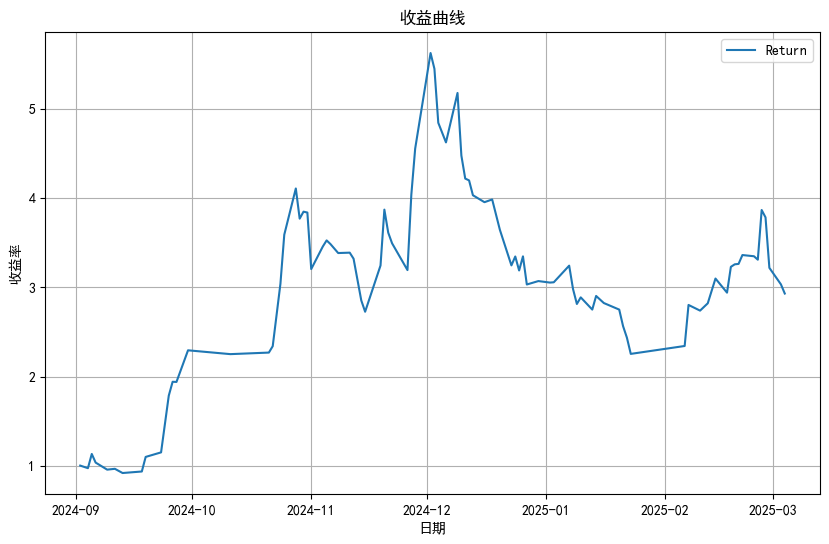

In [15]:
plot(ddwndx, 'cumulative_returns')


In [16]:
ddwndx

,id,strategy_name,sub_strategy_name,stock_code,stock_name,stock_rank,block_category,block_codes,industry_code,max_block_category_rank,...,low_7,close_8,low_8,close_9,low_9,close_10,low_10,real_open,r_return,cumulative_returns
date_key,,,,,,,,,,,,,,,,,,,,,
2024-09-02,909,低吸,断低吸,002843.XSHE,泰嘉股份,2,"000035.BKDL,000018.BKDL,000006.BKDL,000027.BKD...","885806.DDBK,885800.DDBK,885921.DDBK,885376.DDB...",980365.ZHBK,1,...,-1,-1,-1,-1,-1,-1,-1,13.76,0.001180,1.001180
2024-09-04,970,低吸,断低吸,603726.XSHG,朗迪集团,3,,,,-1,...,-1,-1,-1,-1,-1,-1,-1,15.02,-0.028963,0.972183
2024-09-05,1018,低吸,断低吸,002383.XSHE,合众思壮,2,"000008.BKDL,000023.BKDL,000019.BKDL,000016.BKD...","886021.DDBK,885574.DDBK,885932.DDBK,885564.DDB...","980363.ZHBK,980366.ZHBK",1,...,-1,-1,-1,-1,-1,-1,-1,6.00,0.164000,1.131621
2024-09-06,1062,低吸,断低吸,603978.XSHG,深圳新星,1,,,,-1,...,-1,-1,-1,-1,-1,-1,-1,11.14,-0.085381,1.035003
2024-09-09,1112,低吸,断低吸,600829.XSHG,人民同泰,3,"000006.BKDL,000004.BKDL,000009.BKDL","885490.DDBK,885502.DDBK,885879.DDBK,885539.DDB...","980345.ZHBK,980378.ZHBK",1,...,-1,-1,-1,-1,-1,-1,-1,6.35,-0.076591,0.955731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-26,3090,低吸,断低吸,603118.XSHG,共进股份,4,"000012.BKDL,000003.BKDL,000026.BKDL,000006.BKD...","885840.DDBK,885843.DDBK,885459.DDBK,886009.DDB...",980376.ZHBK,1,...,-1,-1,-1,-1,-1,-1,-1,12.52,0.168329,3.866597
2025-02-27,3141,低吸,断低吸,002824.XSHE,和胜股份,5,,,,-1,...,-1,-1,-1,-1,-1,-1,-1,20.11,-0.021388,3.783898
2025-02-28,3705,低吸,断低吸,002522.XSHE,浙江众成,3,"000036.BKDL,000006.BKDL,000004.BKDL,000022.BKD...","885924.DDBK,886021.DDBK,885806.DDBK,885929.DDB...","980364.ZHBK,980373.ZHBK",1,...,-1,-1,-1,-1,-1,-1,-1,6.13,-0.149450,3.218394


In [17]:
ddwndx['r_pct'] = ddwndx['real_open']/ddwndx['open_price']
pd.set_option('display.max_columns', None)
ddwndx.sort_values(by='r_pct', ascending=False)

,id,strategy_name,sub_strategy_name,stock_code,stock_name,stock_rank,block_category,block_codes,industry_code,max_block_category_rank,max_block_code_rank,max_industry_code_rank,is_bottom,is_broken_plate,is_down_broken,is_fall,is_first_down_broken,is_first_up_broken,is_gestation_line,is_half,is_high,is_highest,is_long_shadow,is_low,is_medium,is_meso,is_plummet,is_pre_st,is_small_high_open,is_up_broken,is_weak,first_limit_up_days,jsjl,cjs,xcjw,jssb,open_pct_rate,open_price,close_price,pre_close_price,next_day_open_price,next_day_close_price,next_day_high_price_open_10mins,next_day_low_price_open_10mins,next_day_high_price,next_day_low_price,in_premarket,in_premarket_match,mod_code,mod_name,mod_short_line_score,mod_short_line_score_change,mod_short_line_rank,mod_trend_score,mod_trend_score_change,mod_trend_rank,created_at,first_tick_amount,return,real_return,close_return,close_real_return,close_1,low_1,close_2,low_2,close_3,low_3,close_4,low_4,close_5,low_5,close_6,low_6,close_7,low_7,close_8,low_8,close_9,low_9,close_10,low_10,real_open,r_return,cumulative_returns,r_pct
date_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-11-19,1145,低吸,断低吸,002403.XSHE,爱仕达,3,,,,-1,-1,-1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0.0,60.42,182.68,0.0,-9.17,9.51,11.52,-1.0,11.90,12.67,-1.0,-1.0,-1.0,-1.0,0,0,9G0032,断低吸,-79.45,-29.59,62,35.43,-8.14,28,2025-02-15 18:40:04,10514256.0,0.251314,0.246314,0.332282,0.327282,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,9.99,0.190191,3.244533,1.050473
2024-12-23,1452,低吸,断低吸,600255.XSHG,鑫科材料,2,,,,-1,-1,-1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0.0,977.10,465.79,0.0,-2.67,4.01,3.71,-1.0,3.70,3.86,-1.0,-1.0,-1.0,-1.0,0,0,9G0032,断低吸,-86.84,-2.13,67,-8.51,-3.09,45,2025-02-15 19:12:08,170922641.0,-0.077307,-0.082307,-0.037406,-0.042406,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4.15,-0.109434,3.245826,1.034913
2025-01-07,364,低吸,断低吸,002397.XSHE,梦洁股份,1,,,,-1,-1,-1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0.0,773.22,513.57,0.0,-0.53,3.74,4.14,-1.0,4.11,4.02,-1.0,-1.0,-1.0,-1.0,0,0,9G0032,断低吸,-109.10,-3.26,59,-88.25,-16.93,52,2025-02-15 19:24:06,37238259.0,0.098930,0.093930,0.074866,0.069866,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3.87,0.061016,3.242770,1.034759
2024-11-12,832,低吸,断低吸,600619.XSHG,海立股份,1,,,,-1,-1,-1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0.0,1641.13,1619.06,0.0,-4.50,18.90,20.47,-1.0,19.03,18.42,-1.0,-1.0,-1.0,-1.0,0,0,9G0032,断低吸,24.68,-64.25,34,118.81,-21.24,9,2025-02-15 18:33:57,362169360.0,0.006878,0.001878,-0.025397,-0.030397,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,19.40,-0.020072,3.320371,1.026455
2024-12-18,1194,低吸,断低吸,002639.XSHE,雪人股份,5,"000012.BKDL,000003.BKDL,000038.BKDL,000035.BKD...","885571.DDBK,885775.DDBK,885825.DDBK,885617.DDB...",980365.ZHBK,1,2,31,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,121.93,210.36,0.0,-8.84,7.84,8.50,-1.0,8.10,8.64,-1.0,-1.0,-1.0,-1.0,0,0,9G0032,断低吸,-55.09,-105.28,55,17.47,-35.67,30,2025-02-15 19:08:13,33259632.0,0.033163,0.028163,0.102041,0.097041,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,8.03,0.007717,3.984780,1.024235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-14,2610,低吸,断低吸,002929.XSHE,润建股份,1,"000012.BKDL,000026.BKDL,000018.BKDL,000019.BKD...","885517.DDBK,885461.DDBK,886062.DDBK,885564.DDB...","980753.ZHBK,980376.ZHBK",1,1,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,206.01,227.51,0.0,-3.57,48.41,55.22,-1.0,53.00,51.65,-1.0,-1.0,-1.0,-1.0,0,0,9G0032,断低吸,-8.56,-24.00,53,-81.57,-2.54,72,2025-02-28 17:23:44,103548990.0,0.094815,0.089815,0.066928,0.061928,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,48.21,0

<Axes: ylabel='Frequency'>

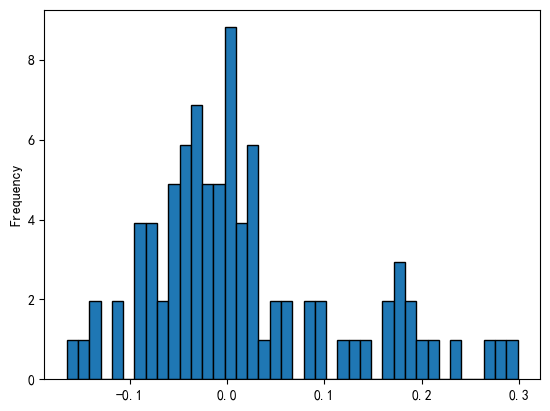

In [18]:
ddwndx['r_return'].plot(kind='hist', bins=40, density=True, edgecolor='black')

In [19]:
# 最大回撤: -41.05%
# 夏普比率: 0.24
# 总收益率: 513.92%
# 年化收益率: 1355.40%
# 波动率: 10.28%
# 总盈亏: 514.02%
# 成功次数: 45
# 失败次数: 46
# 总天数: 91
# 总交易次数: 91
# 交易频率: 100.00%
# 胜率: 49.45%
# 平均盈利: 10.32%
# 平均亏损: -5.15%
# 最大盈利: 29.90%
# 最大亏损: -16.25%
# 盈亏比: 2.01
# 凯利公式最佳仓位: 24.26%

In [20]:
# 最大回撤: -41.05%
# 夏普比率: 0.23
# 总收益率: 482.12%
# 年化收益率: 1244.19%
# 波动率: 10.30%
# 总盈亏: 482.01%
# 成功次数: 46
# 失败次数: 47
# 总天数: 93
# 总交易次数: 93
# 交易频率: 100.00%
# 胜率: 49.46%
# 平均盈利: 10.23%
# 平均亏损: -5.26%
# 最大盈利: 29.90%
# 最大亏损: -16.25%
# 盈亏比: 1.95
# 凯利公式最佳仓位: 23.50%